# Stroke Dataset Prediction 
by **Lourenz**

This notebook contains a dataset obtained from Kaggle. In this notebook, I am going to explore the data and apply machine learning models to determine the factors that contributes to stroke.

## Data Preprocessing

In [1]:
import sklearn
sklearn. __version__

'0.24.1'

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')

%matplotlib inline

### Import dataset

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

### Features

- `id`: unique identifier
- `gender`: "Male", "Female" or "Other"
- `age`: age of the patient
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- `ever_married`: "No" or "Yes"
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- `Residence_type`: "Rural" or "Urban"
- `avg_glucose_level`: average glucose level in blood
- `bmi`: body mass index
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- `stroke`: 1 if the patient had a stroke or 0 if not

<i>**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient</i>

### Value counts

In [6]:
print(df['work_type'].value_counts(),"\n")
print(df['gender'].value_counts(),"\n")
print(df['ever_married'].value_counts(),"\n")
print(df['Residence_type'].value_counts(),"\n")
print(df['smoking_status'].value_counts(),"\n")
print(df['stroke'].value_counts(),"\n")

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Cleaning

In [8]:
def clean_data(df):
   
    df.loc[df['gender'] == 'Male', 'gender' ] = 0
    df.loc[df['gender'] == 'Female', 'gender' ] = 1    
    df.loc[df['gender'] == 'Other', 'gender' ] = 2

    df.loc[df['ever_married'] == 'Yes', 'ever_married' ] = 1
    df.loc[df['ever_married'] == 'No', 'ever_married' ] = 0
    
    df.loc[df['work_type'] == 'Private', 'work_type'] = 0
    df.loc[df['work_type'] == 'Self-employed','work_type'] = 1
    df.loc[df['work_type'] == 'children', 'work_type'] = 2
    df.loc[df['work_type'] == 'Govt_job', 'work_type'] = 3
    df.loc[df['work_type'] == 'Never_worked', 'work_type'] = 4
    
    df.loc[df['Residence_type'] == 'Rural', 'Residence_type' ] = 0
    df.loc[df['Residence_type'] == 'Urban', 'Residence_type' ] = 1
    
    df.loc[df['smoking_status'] == 'never smoked', 'smoking_status'] = 0
    df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = 1
    df.loc[df['smoking_status'] == 'formerly smoked', 'smoking_status'] = 2
    df.loc[df['smoking_status'] == 'smokes', 'smoking_status'] = 3

    df['bmi'] = df['bmi'].fillna(df['bmi'].dropna().median())

In [9]:
clean_data(df)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,1,0,202.21,28.1,0,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.0,0,1


### Use of dummy encoding

In [10]:
dummy = pd.get_dummies(df)
dummy

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,gender_2,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,9046,67.0,0,1,228.69,36.6,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,51676,61.0,0,0,202.21,28.1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,60182,49.0,0,0,171.23,34.4,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
5106,44873,81.0,0,0,125.20,40.0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
5107,19723,35.0,0,0,82.99,30.6,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
dummy.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_0', 'gender_1', 'gender_2', 'ever_married_0',
       'ever_married_1', 'work_type_0', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'Residence_type_0', 'Residence_type_1',
       'smoking_status_0', 'smoking_status_1', 'smoking_status_2',
       'smoking_status_3'],
      dtype='object')

In [12]:
dummy_1 = dummy['work_type_0']
dummy_2 = dummy['work_type_1']
dummy_3 = dummy['work_type_2']
dummy_4 = dummy['work_type_3']
dummy_5 = dummy['work_type_4']
dummy_ = pd.concat([dummy_1, dummy_2, dummy_3, dummy_4, dummy_5], axis = 1)
dummy_.head()

,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [13]:
new_df = pd.concat([df, dummy_], axis = 1)
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4
0,9046,0,67.0,0,1,1,0,1,228.69,36.6,2,1,1,0,0,0,0
1,51676,1,61.0,0,0,1,1,0,202.21,28.1,0,1,0,1,0,0,0
2,31112,0,80.0,0,1,1,0,0,105.92,32.5,0,1,1,0,0,0,0
3,60182,1,49.0,0,0,1,0,1,171.23,34.4,3,1,1,0,0,0,0
4,1665,1,79.0,1,0,1,1,0,174.12,24.0,0,1,0,1,0,0,0


In [14]:
for col in ['gender','hypertension','heart_disease','ever_married','Residence_type','smoking_status', 'stroke']:
    new_df[col] = new_df[col].astype("category")

In [15]:
new_df.dtypes

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type              object
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
work_type_0             uint8
work_type_1             uint8
work_type_2             uint8
work_type_3             uint8
work_type_4             uint8
dtype: object

In [16]:
new_df = new_df.drop(["id"], axis = 1)

## Data Visualization

### `gender `

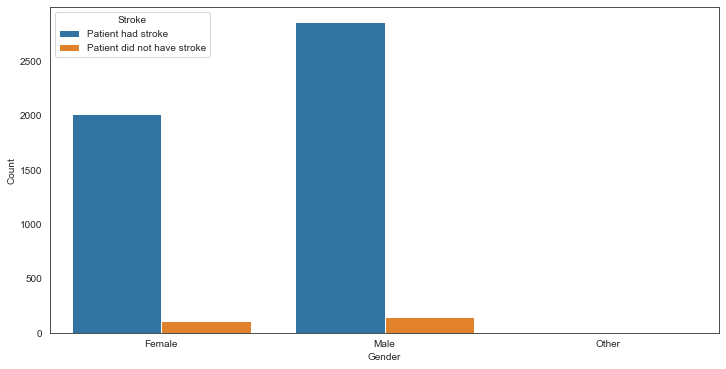

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(data = new_df, x='gender', hue='stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Female', 'Male', 'Other'])
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `age`

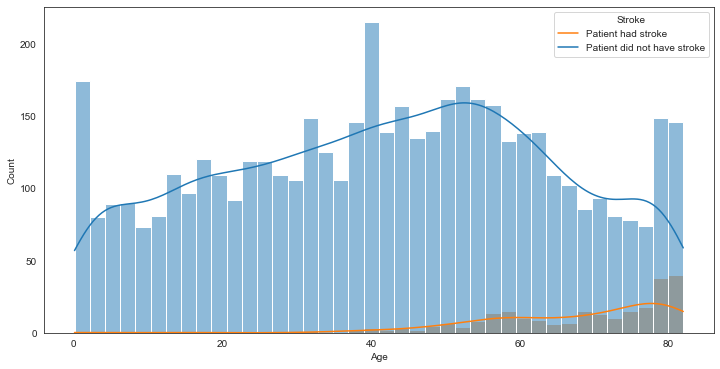

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=new_df, x='age', hue='stroke', bins=40, multiple='layer', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `hypertension`

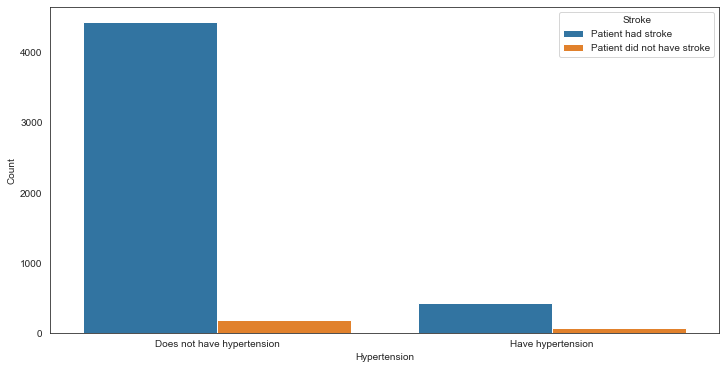

In [19]:
plt.figure(figsize = (12,6))
sns.countplot(data = new_df, x='hypertension', hue='stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks([0, 1], ['Does not have hypertension', 'Have hypertension'])
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `heart_disease`

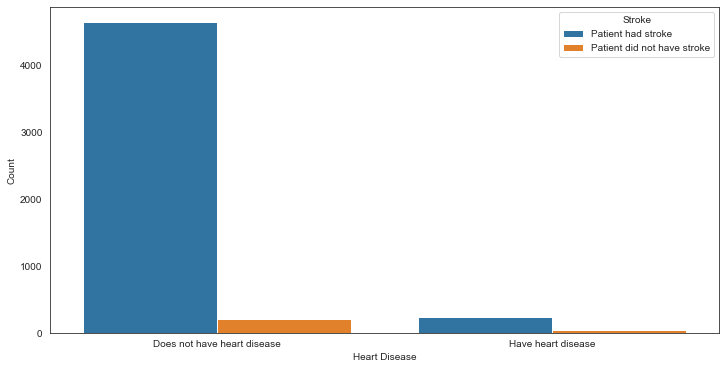

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(data = new_df, x='heart_disease', hue='stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['Does not have heart disease', 'Have heart disease'])
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `ever_married`

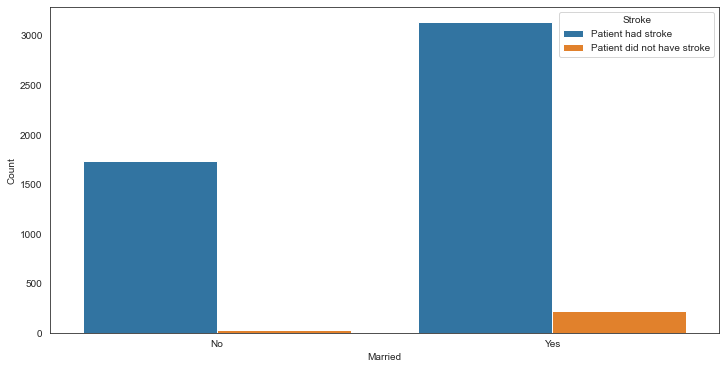

In [21]:
plt.figure(figsize = (12,6))
sns.countplot(data = new_df, x='ever_married', hue='stroke')
plt.xlabel('Married')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `work_type`

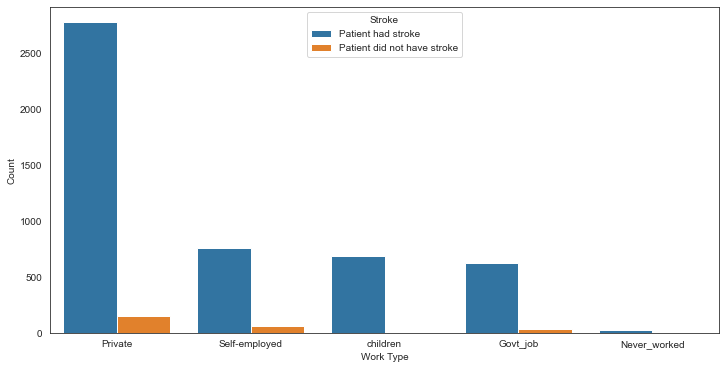

In [22]:
plt.figure(figsize = (12,6))
sns.countplot(data = new_df, x='work_type', hue='stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4], ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'])
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `Residence_type`

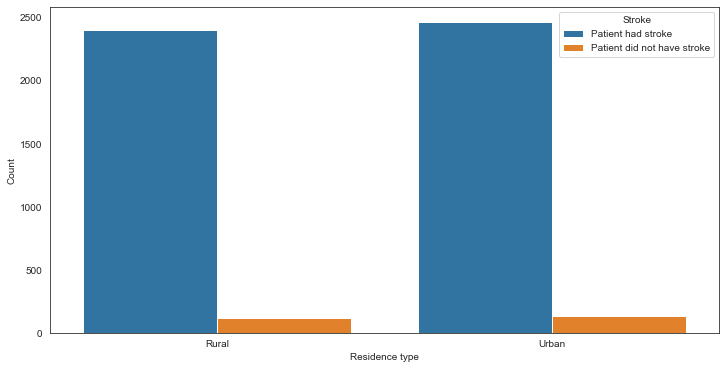

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(data = new_df, x='Residence_type', hue='stroke')
plt.xlabel('Residence type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rural', 'Urban'])
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `avg_glucose_level`

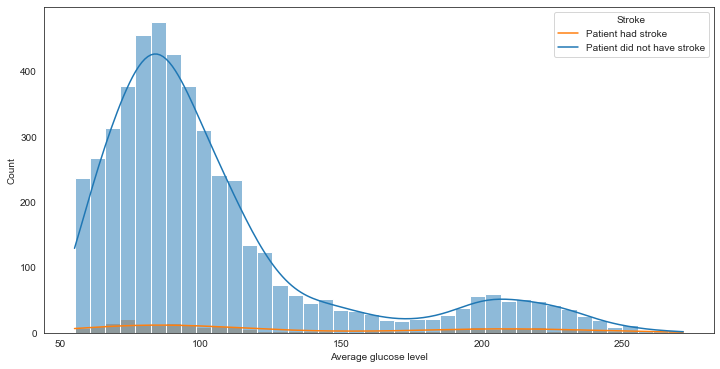

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=new_df, x='avg_glucose_level', hue='stroke', bins=40, multiple='layer', kde=True)
plt.xlabel('Average glucose level')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `bmi`

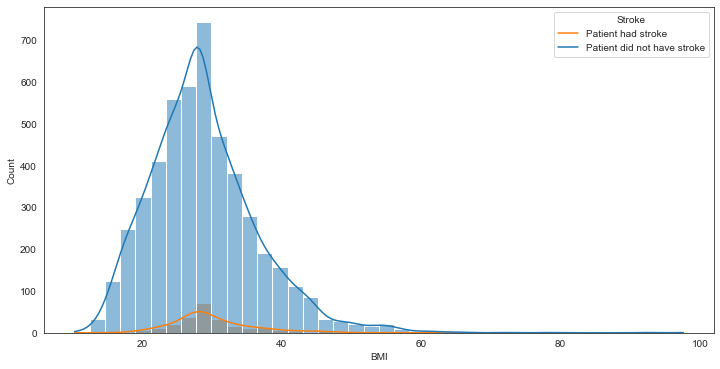

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(data=new_df, x='bmi', hue='stroke', bins=40, multiple='layer', kde=True)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### `smoking_status`

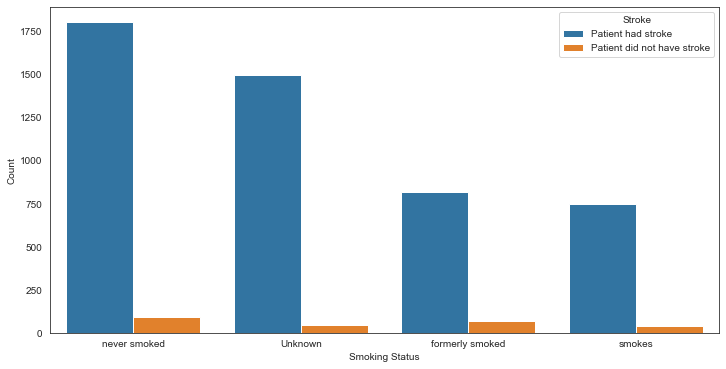

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(data = new_df, x='smoking_status', hue='stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['never smoked', 'Unknown', 'formerly smoked', 'smokes'])
plt.legend(title='Stroke', labels=['Patient had stroke', 'Patient did not have stroke'])
plt.show()

### Correlation

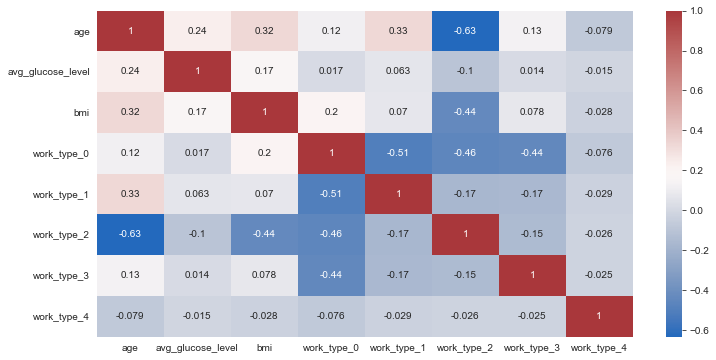

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_df.corr(), cmap='vlag', annot=True)
plt.show()

## Feature Selection

In [28]:
new_df = new_df.drop(['stroke', 'work_type'], axis = 1)

In [29]:
X = new_df
y = df.pop("stroke")

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 10)

## Creating Model

In [32]:
models = []
accuracies = []

### Linear Regression

In [33]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', LogisticRegression())
])

param_grid = {'model__C': [0.001, 0.01, 0.1, 1, 10, 100], 'model__max_iter':[1000]}
lr = GridSearchCV(pipe,
                  param_grid,
                  cv=3)
lr.fit(X_train, y_train)
lr_score = lr.best_score_ * 100
print('Accuracy of Logistic Regression model is: {:.2f}%'.format(lr_score))

models.append('LogisticRegression')
accuracies.append(lr_score)

Accuracy of Logistic Regression model is: 95.45%


### K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', KNeighborsClassifier())
])

param_grid ={"model__n_neighbors": [1,2,3,4,5,6,7,8,9,10]}
knn = GridSearchCV(pipe,
                  param_grid,
                  cv=3)
knn.fit(X_train, y_train)
knn_score = knn.best_score_ * 100
print('Accuracy of KNN model is: {:.2f}%'.format(knn_score))

models.append('KNeighborsClassifier')
accuracies.append(knn_score)

Accuracy of KNN model is: 95.43%


### Support Vector Classifier

In [35]:
from sklearn.svm import SVC

pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', SVC())
])

param_grid = {'model__C':[0.5, 0.75, 1, 2], 'model__degree':[1, 2, 3]}
svc = GridSearchCV(pipe,
                  param_grid,
                  cv=3)
svc.fit(X_train, y_train)
svc_score = svc.best_score_ * 100
print('Accuracy of SVC model is: {:.2f}%'.format(svc_score))

models.append('SVC')
accuracies.append(svc_score)

Accuracy of SVC model is: 95.43%


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', DecisionTreeClassifier())
])

param_grid = {'model__criterion':['gini', 'entropy']}
dt = GridSearchCV(pipe,
                  param_grid,
                  cv=3)
dt.fit(X_train, y_train)
dt_score = dt.best_score_ * 100
print('Accuracy of Decision Tree model is: {:.2f}%'.format(dt_score))

models.append('DecisionTree')
accuracies.append(dt_score)

Accuracy of Decision Tree model is: 91.85%


### Random Forests

In [37]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', DecisionTreeClassifier())
])

param_grid = {'model__min_samples_split': [2], 'model__random_state':[5]}
rf = GridSearchCV(pipe,
                  param_grid,
                  cv=3)
rf.fit(X_train, y_train)
rf_score = rf.best_score_ * 100
print('Accuracy of Random Forests model is: {:.2f}%'.format(rf_score))

models.append('RandomForests')
accuracies.append(rf_score)

Accuracy of Random Forests model is: 91.83%


## Model Comparison

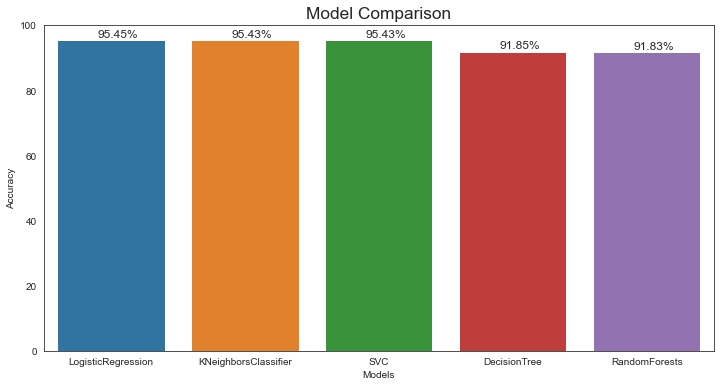

In [38]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x= models, y=accuracies)
plt.title('Model Comparison', fontsize = 'xx-large')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(horizontalalignment = 'center')
plt.yticks()
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + 0.3, height*1.01), fontsize = 'large')
plt.show()

### Confusion Matrix on Test Set

Confusion Matrix:


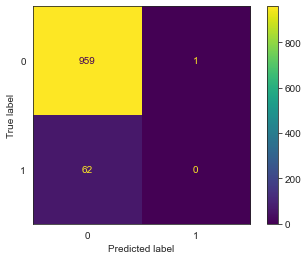

In [39]:
pred = lr.predict(X_test)

from sklearn.metrics import classification_report, plot_confusion_matrix

lr_score = lr.score(X_test, y_test)

print('Confusion Matrix:')
plot_confusion_matrix(lr, X_test, y_test);

### Classification Report on Test Set

In [40]:
print('Classification Report:\n',(classification_report(y_test, pred)))
print('Accuracy: {:.2f}%'.format(lr_score * 100))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy: 93.84%


### AUC-ROC Curve on Test Set

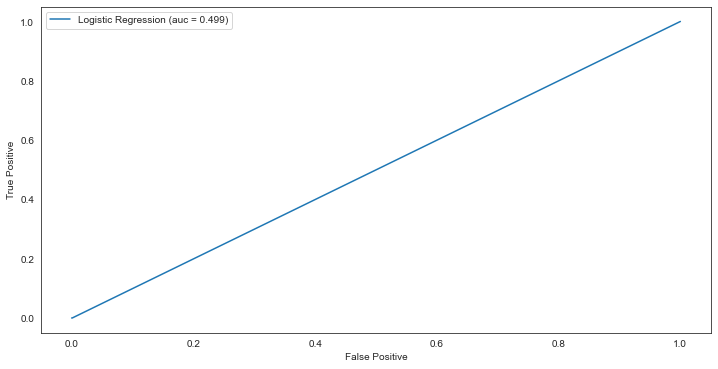

In [41]:
from sklearn.metrics import auc, roc_curve

lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, pred)
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize = (12,6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (auc = {:.3f})'.format(lr_auc))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

# Save model

In [42]:
import joblib

In [43]:
joblib.dump(lr, "stroke_dataset_model.pkl")

['stroke_dataset_model.pkl']

# Load model

In [44]:
load_model = joblib.load("stroke_dataset_model.pkl")

In [45]:
result = load_model.score(X_test, y_test)
result

0.9383561643835616